In [3]:
# -*- coding: utf-8 -*-
# -*- author : Vincent Roduit - Yannis Laaroussi - Fabio Palmisano -*-
# -*- date : 2024-03-15 -*-
# -*- Last revision: 2024-03-15 (Vincent Roduit)-*-
# -*- python version : 3.11.7 -*-
# -*- Description: Notebook that summarizes results-*-

# <center> COM - 480: Data Visualization</center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center> Olympic Games Visualization </center>
---

In [79]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Ignore SettingWithCopyWarning
pd.options.mode.chained_assignment = None  

# 1. Load Data

You can download the Data from this website:

In [5]:
DATA_PATH = "../../data/"
df_athletes = pd.read_csv(os.path.join(DATA_PATH, 'olympic_athletes.csv'))
df_hosts = pd.read_csv(os.path.join(DATA_PATH, 'olympic_hosts.csv'))
df_medals = pd.read_csv(os.path.join(DATA_PATH, 'olympic_medals.csv'))
df_results = pd.read_csv(os.path.join(DATA_PATH, 'olympic_results.csv'))

# 2. Preliminary Analysis

## 2.1 athletes

In [6]:
df_athletes.head(10)

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN
5,https://olympics.com/en/athletes/matt-graham,Matt GRAHAM,3,Sochi 2014,1994.0,\r\n\r\n\r\n1\r\n\r\nS\r\n\r\n,NaN
6,https://olympics.com/en/athletes/ikuma-horishima,Ikuma HORISHIMA,2,PyeongChang 2018,1997.0,\r\n\r\n\r\n1\r\n\r\nB\r\n\r\n,NaN
7,https://olympics.com/en/athletes/daichi-hara,Daichi HARA,2,PyeongChang 2018,1997.0,\r\n\r\n\r\n1\r\n\r\nB\r\n\r\n,NaN
8,https://olympics.com/en/athletes/laurent-dumais,Laurent DUMAIS,1,Beijing 2022,1996.0,NaN,NaN
9,https://olympics.com/en/athletes/james-matheson,James MATHESON,2,PyeongChang 2018,1995.0,NaN,NaN


In [7]:
df_athletes.describe()

,games_participations,athlete_year_birth
count,75904.000000,73448.000000
mean,1.535874,1961.619377
std,0.854563,28.129576
min,0.000000,1836.000000
25%,1.000000,1946.000000
50%,1.000000,1968.000000
75%,2.000000,1983.000000
max,10.000000,2009.000000


### Athletes participations

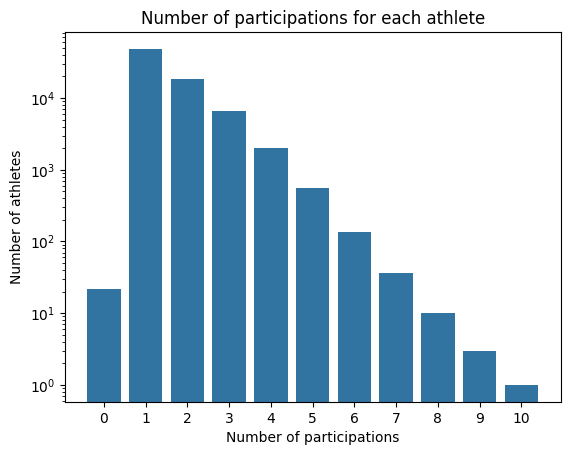

In [8]:
# Plot the number of participation for each athlete
participations = df_athletes['games_participations'].value_counts().reset_index()
sns.barplot(x='games_participations', y='count', data=participations)
plt.title('Number of participations for each athlete')
plt.xlabel('Number of participations')
plt.ylabel('Number of athletes')
plt.semilogy()
plt.show()

## 2.2 Hosts

In [9]:
df_hosts.head(5)

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


In [10]:
#Number of olympic games 
nb_games = df_hosts['game_slug'].nunique()
nb_locations = df_hosts['game_location'].nunique()
print(f'There are {nb_games} different Olympic games and {nb_locations} different countries that hosted the games')

There are 53 different Olympic games and 26 different countries that hosted the games


### Plot Hostings per country

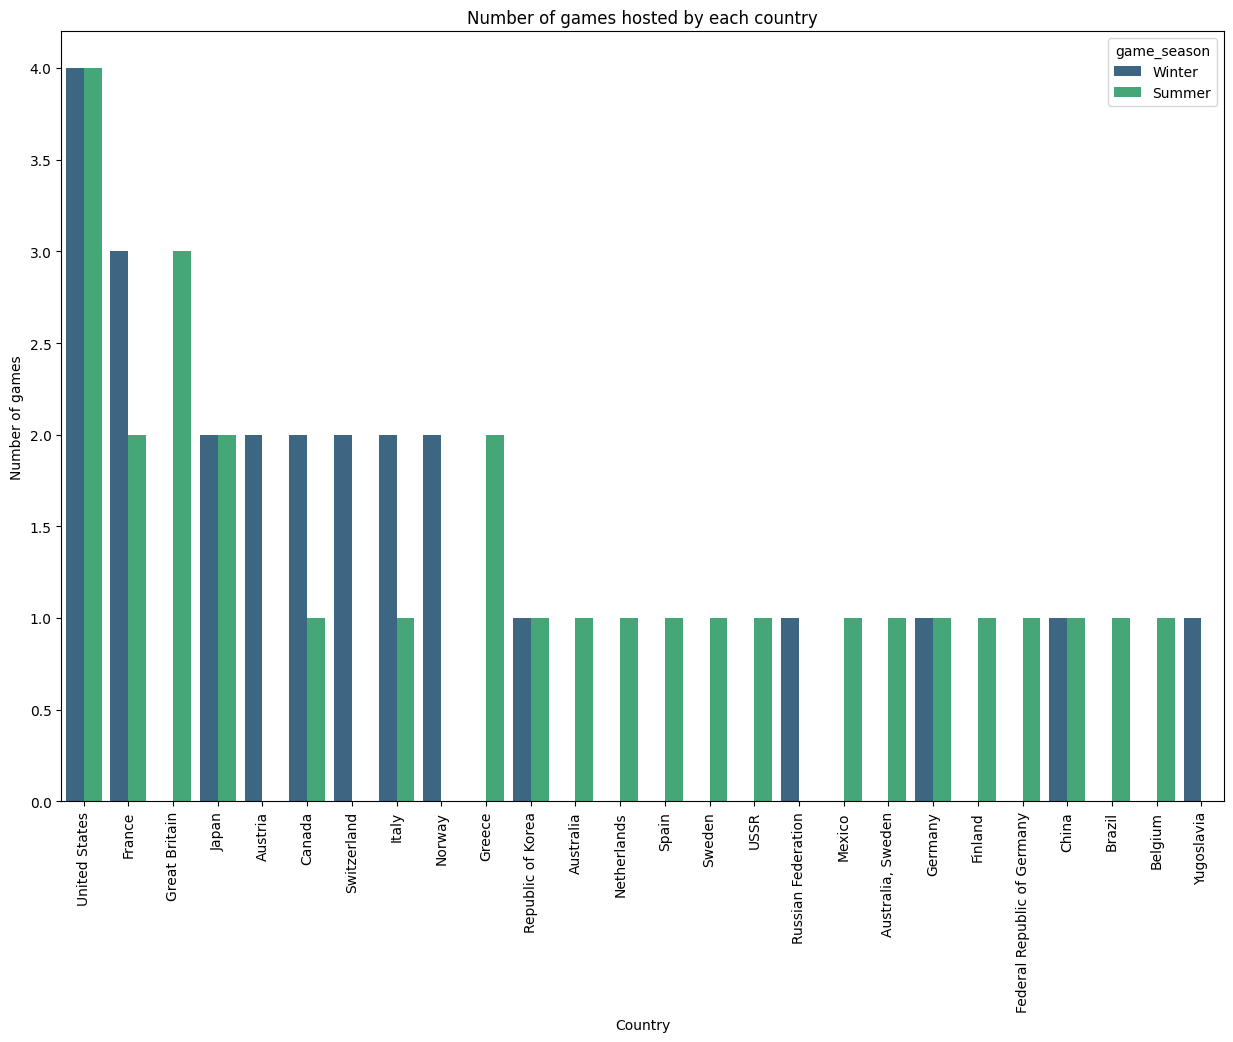

In [11]:
#Number of games hosted by each country
plt.figure(figsize=(15, 10))
games_by_country = df_hosts[['game_location','game_season']].value_counts().reset_index()
sns.barplot(data=games_by_country, x='game_location',y='count',hue='game_season', palette='viridis')
plt.title('Number of games hosted by each country')
plt.xlabel('Country')
plt.ylabel('Number of games')
plt.xticks(rotation=90)
plt.show()

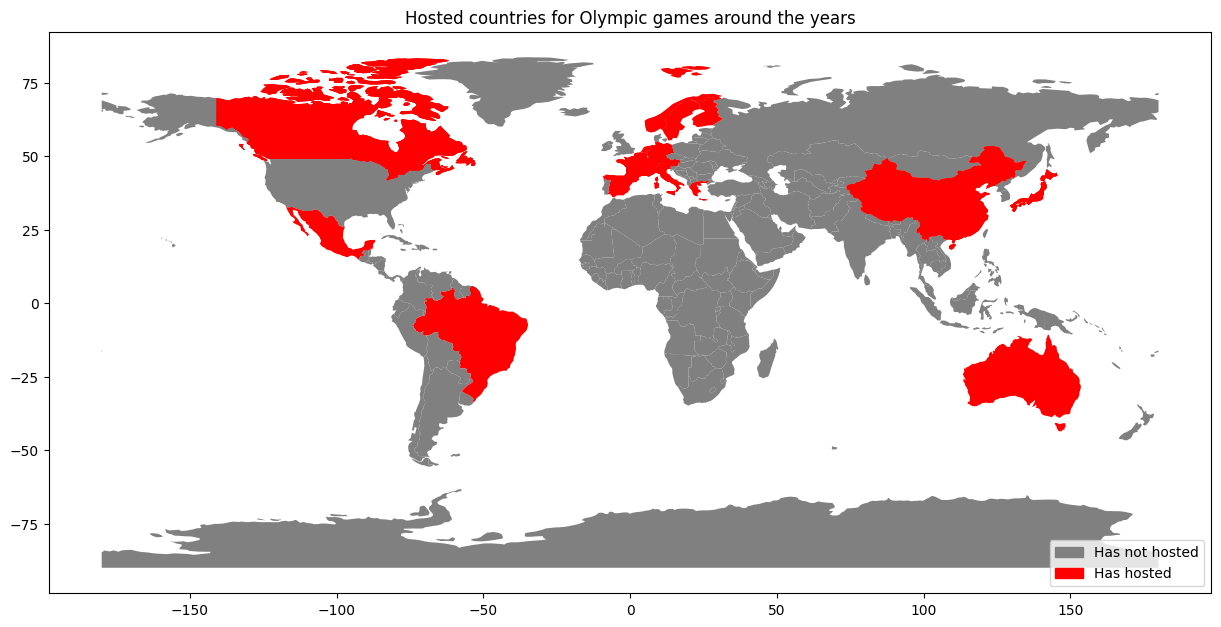

In [12]:
hosts = df_hosts.copy()
cmap = ListedColormap(['grey', 'red'])
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Get the world geometry
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Make a dataframe with only the country and the year of the games + country in 3 letters
hosts = hosts[['game_year','game_location','game_season']].drop_duplicates()
hosts = hosts.merge(world[['name','iso_a3']], left_on='game_location', right_on='name')
hosts = hosts.drop(columns=['name'])

# Merge world and hosts dataframes
hosts = world.merge(hosts, how='outer', on='iso_a3')

# Fill NaN values with a default value
hosts['game_year'] = hosts['game_year'].fillna(0)

# Plot result in world map around the years

# Create the legend patches
legend_labels = {0: 'Has not hosted', 1: 'Has hosted'}
patches = [mpatches.Patch(color=color, label=label)
           for color, label in zip(['gray', 'red'], legend_labels.values())]

# Add the legend to the plot
plt.legend(handles=patches, loc='lower right')
hosts.plot(column='game_year', ax=ax, cmap=cmap, 
                  legend_kwds={'label': "Year of the games", 'orientation': "horizontal"})
plt.title('Hosted countries for Olympic games around the years')
plt.show()

## 2.3 Medals

In [13]:
df_medals = df_medals.merge(df_hosts, left_on='slug_game', right_on='game_slug')

In [14]:
df_medals.query("discipline_title == 'Ice Hockey'").head(5)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
166,Ice Hockey,beijing-2022,Men,Men,GOLD,GameTeam,Finland,NaN,NaN,Finland,FI,FIN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
167,Ice Hockey,beijing-2022,Men,Men,SILVER,GameTeam,ROC,NaN,NaN,ROC,ROC,ROC,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
168,Ice Hockey,beijing-2022,Men,Men,BRONZE,GameTeam,Slovakia,NaN,NaN,Slovakia,SK,SVK,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
169,Ice Hockey,beijing-2022,Women,Women,GOLD,GameTeam,Canada,NaN,NaN,Canada,CA,CAN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
170,Ice Hockey,beijing-2022,Women,Women,SILVER,GameTeam,United States,NaN,NaN,United States of America,US,USA,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022


In [15]:
df_medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20195 non-null  object
 11  country_3_letter_code  21697 non-null  object
 12  game_slug              21697 non-null  object
 13  game_end_date          21697 non-null  object
 14  game_start_date        21697 non-null  object
 15  game_location      

In [16]:
df_medals.to_csv(os.path.join(DATA_PATH, 'olympic_medals_join.csv'), index=False)

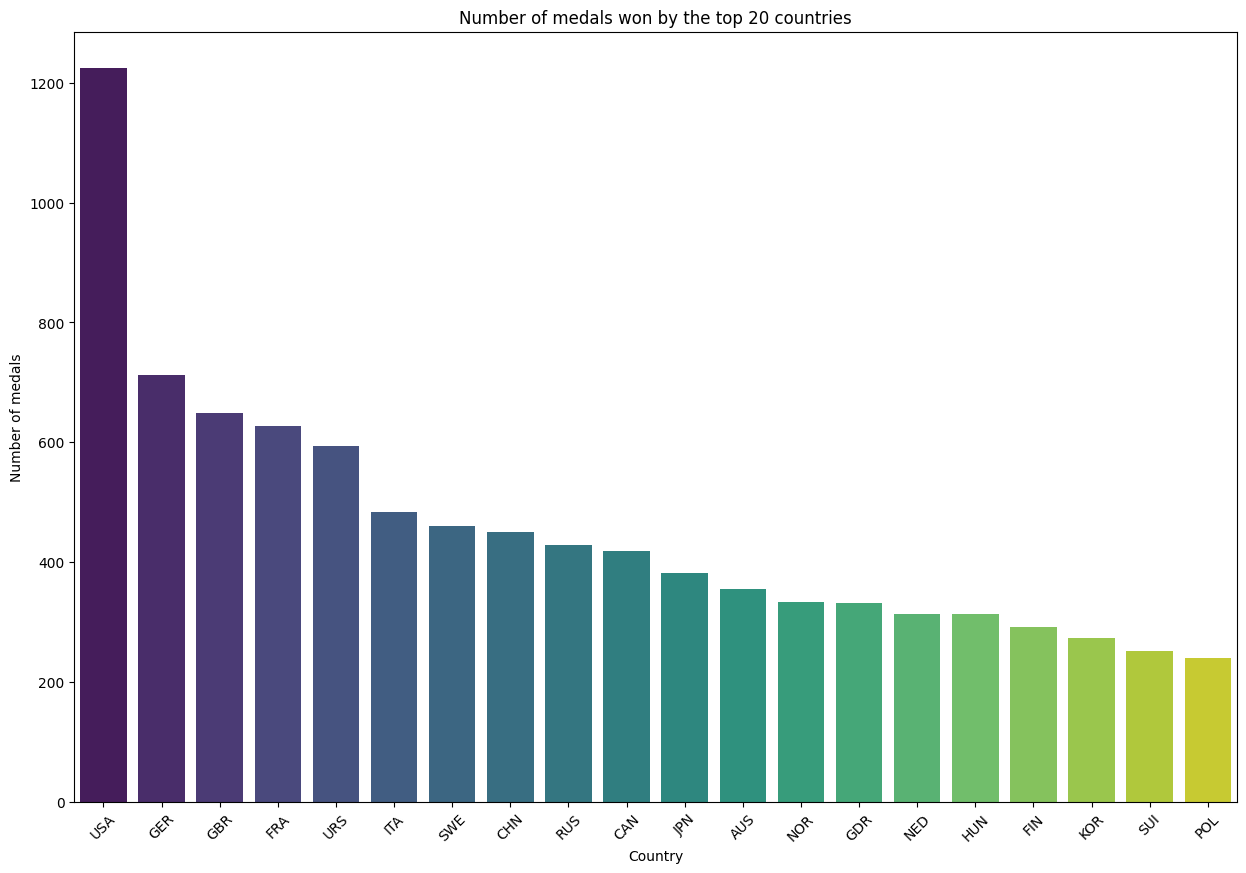

In [17]:
#Number of medals won by each country
plt.figure(figsize=(15, 10))
#Count only medal for team events
medals_by_country = df_medals.drop_duplicates(subset=['medal_type','participant_type','event_title','discipline_title','country_3_letter_code'])
medals_by_country = medals_by_country['country_3_letter_code'].value_counts().reset_index().sort_values(by='count', ascending=False)
sns.barplot(data=medals_by_country.head(20), x='country_3_letter_code',y='count', palette='viridis')
plt.title('Number of medals won by the top 20 countries')
plt.xlabel('Country')
plt.ylabel('Number of medals')
plt.xticks(rotation=45)
plt.show()

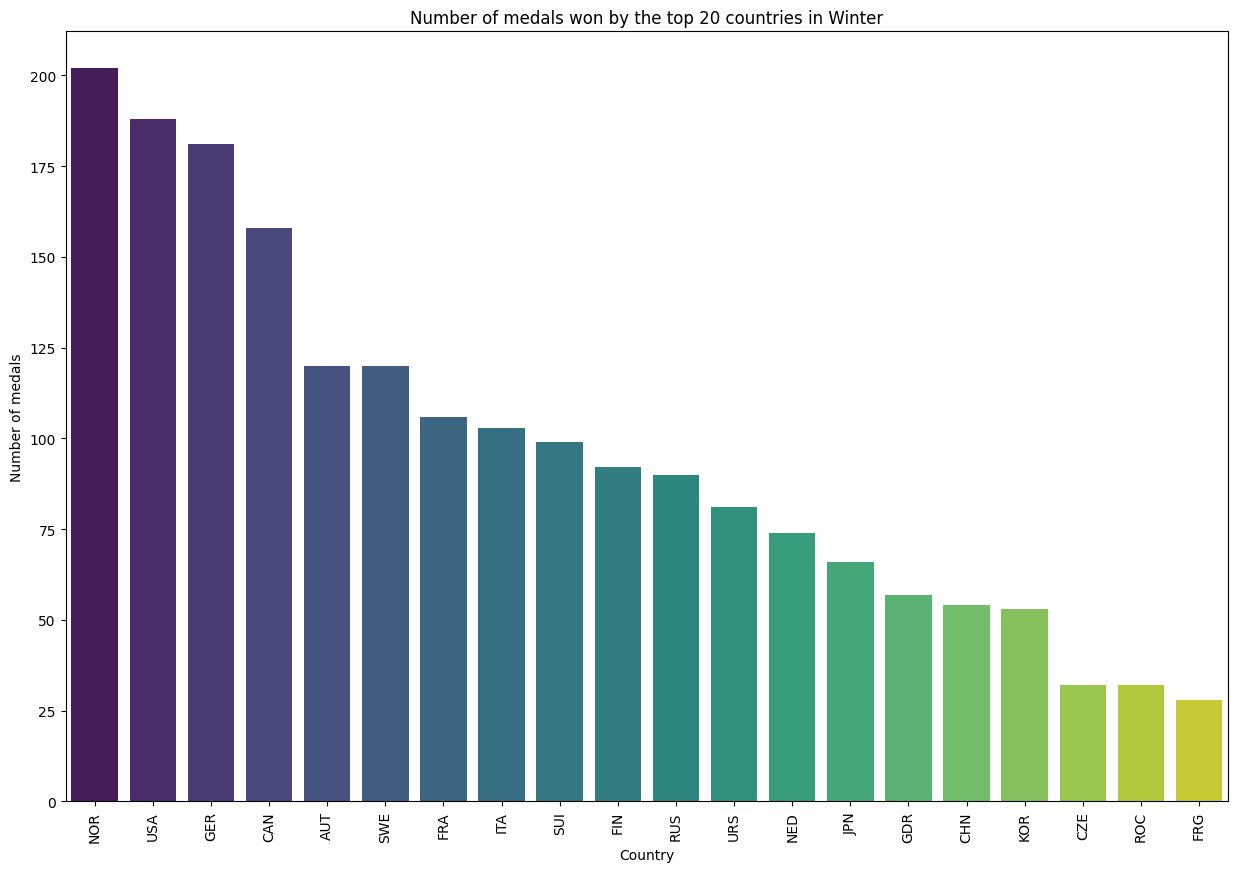

In [18]:
#Number of medals won by each country in Winter
plt.figure(figsize=(15, 10))
medals_by_country = df_medals.drop_duplicates(subset=['medal_type','participant_type','event_title','discipline_title','country_3_letter_code'])
medals_by_country_winter = medals_by_country[['country_3_letter_code','game_season']].query('game_season == "Winter"')
medals_by_country_winter = medals_by_country_winter['country_3_letter_code'].value_counts().reset_index().sort_values(by='count', ascending=False)
sns.barplot(data=medals_by_country_winter.head(20), x='country_3_letter_code',y='count', palette='viridis')
plt.title('Number of medals won by the top 20 countries in Winter')
plt.xlabel('Country')
plt.ylabel('Number of medals')
plt.xticks(rotation=90)
plt.show()

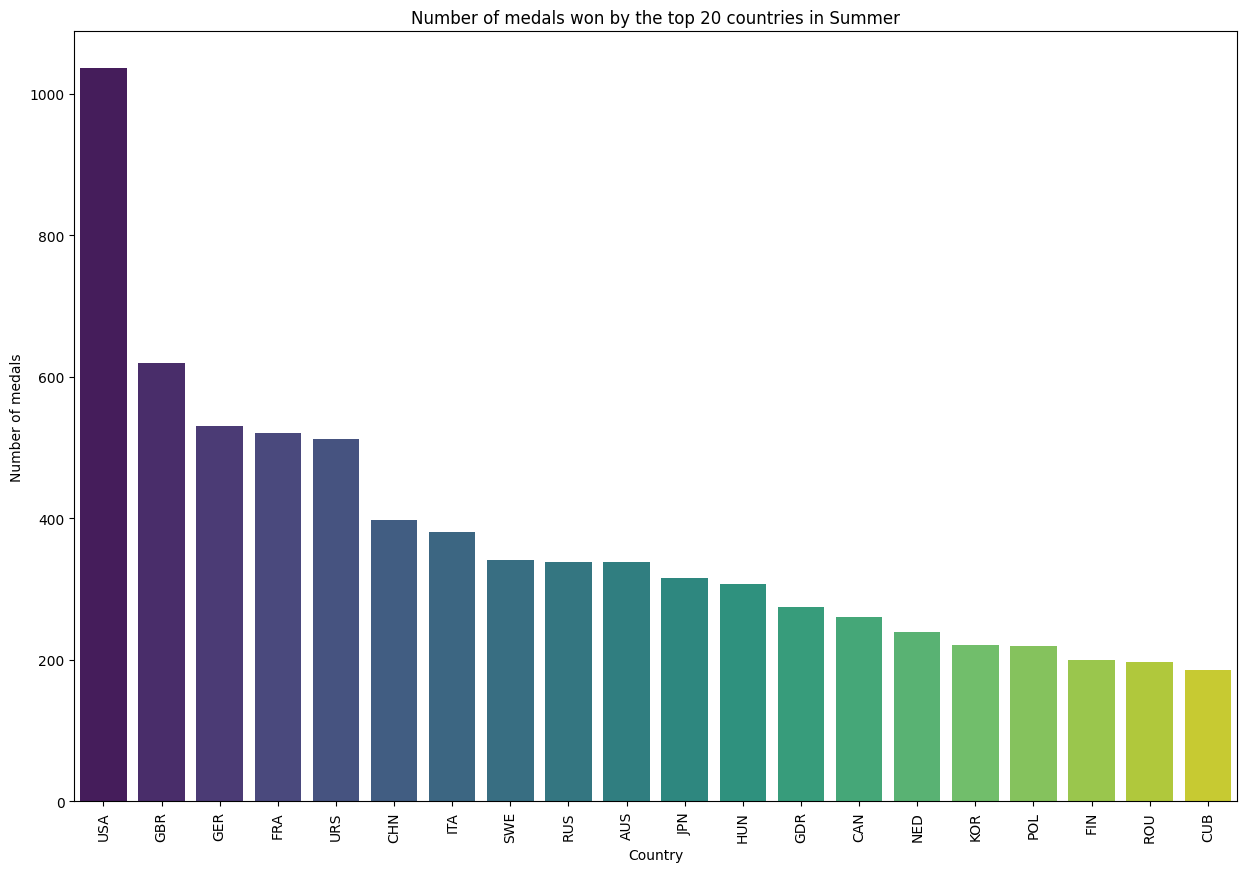

In [19]:
#Number of medals won by each country in Summer
plt.figure(figsize=(15, 10))
medals_by_country_summer = df_medals.drop_duplicates(subset=['medal_type','participant_type','event_title','discipline_title','country_3_letter_code'])
medals_by_country_summer = medals_by_country_summer[['country_3_letter_code','game_season']].query('game_season == "Summer"')
medals_by_country_summer = medals_by_country_summer['country_3_letter_code'].value_counts().reset_index().sort_values(by='count', ascending=False)
sns.barplot(data=medals_by_country_summer.head(20), x='country_3_letter_code',y='count', palette='viridis')
plt.title('Number of medals won by the top 20 countries in Summer')
plt.xlabel('Country')
plt.ylabel('Number of medals')
plt.xticks(rotation=90)
plt.show()

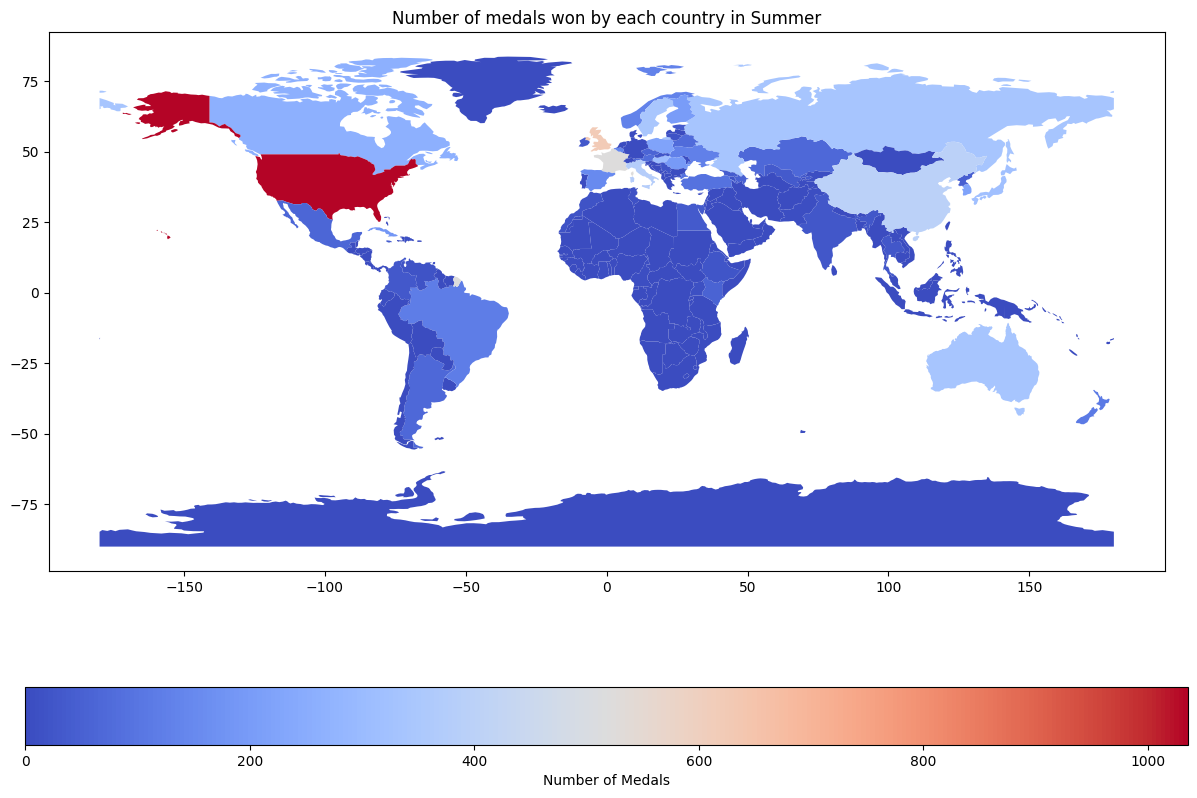

In [20]:
# Get the world geometry
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

medals_by_country_summer.rename(columns={'country_3_letter_code': 'iso_a3'}, inplace=True)

world_medals = world.merge(medals_by_country_summer, how='left', on='iso_a3')

# Fill NaN values with 0
world_medals['count'] = world_medals['count'].fillna(0)

#plot result
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_medals.plot(column='count', ax=ax, legend=True, cmap='coolwarm', 
                  legend_kwds={'label': "Number of Medals", 'orientation': "horizontal"})
plt.title('Number of medals won by each country in Summer')
plt.show()

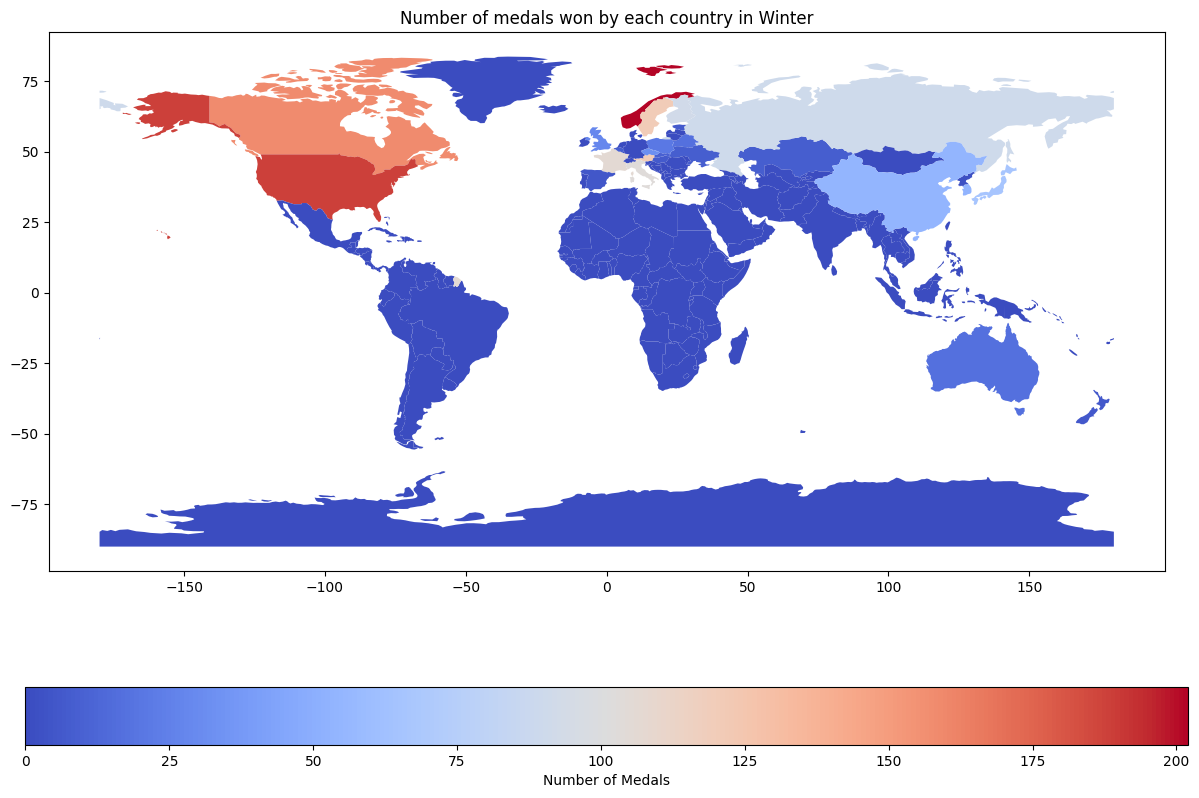

In [21]:
# Get the world geometry
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

medals_by_country_winter.rename(columns={'country_3_letter_code': 'iso_a3'}, inplace=True)

world_medals = world.merge(medals_by_country_winter, how='left', on='iso_a3')

# Fill NaN values with 0
world_medals['count'] = world_medals['count'].fillna(0)

#plot result
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_medals.plot(column='count', ax=ax, legend=True, cmap='coolwarm', 
                  legend_kwds={'label': "Number of Medals", 'orientation': "horizontal"})
plt.title('Number of medals won by each country in Winter')
plt.show()

## 2.4 Results

In [22]:
df_results.query('discipline_title == "Short Board"')

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type


In [23]:
df_results.head(5)

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [24]:
df_results.describe()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
count,162804,162804,162804,162804,20206,7976,32526,158926,162804,157768,162804,129991,141646,78646,90049
unique,86,1567,53,2,3,6845,2,193,238,213,233,68104,75263,46475,12
top,Athletics,individual mixed,rio-2016,Athlete,BRONZE,"[('LETOT LETOT', 'https://olympics.com/en/athl...",True,9,United States of America,US,USA,https://olympics.com/en/athletes/heikki-savola...,Heikki SAVOLAINEN,same time,TIME
freq,19259,2731,7672,141646,7029,37,23613,8279,11916,11916,11916,34,34,99,43774


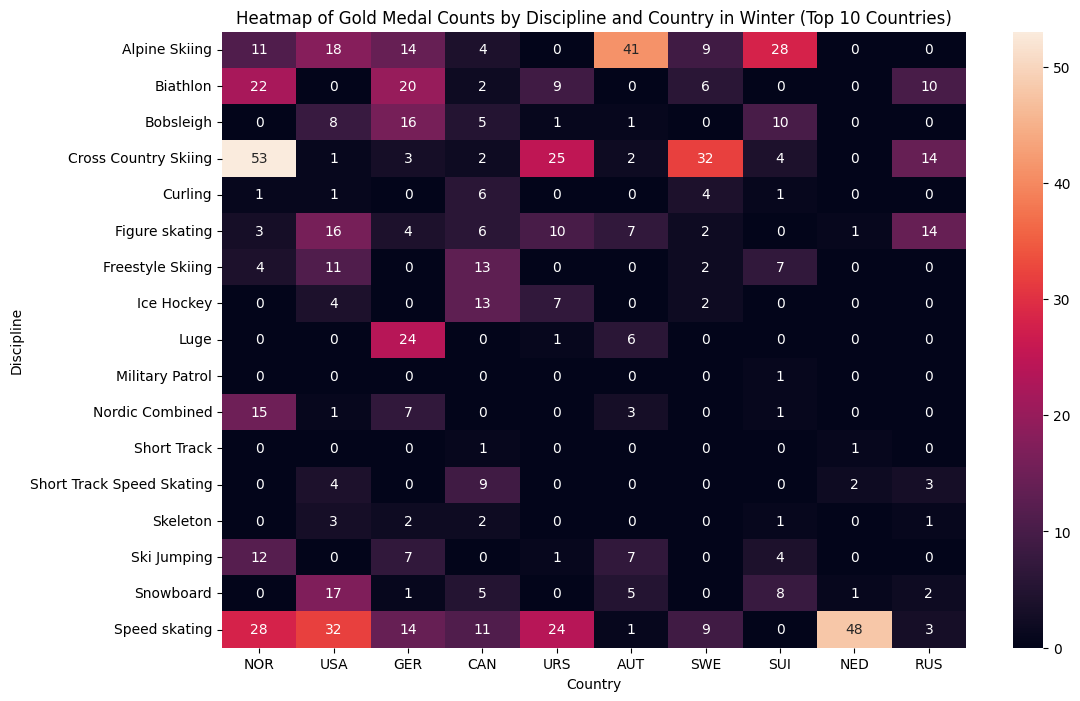

In [25]:
df_results_gold = df_results[df_results['rank_position'] == '1']
df_results_gold = df_results_gold.merge(df_hosts, left_on='slug_game', right_on='game_slug')

df_results_gold_summer = df_results_gold.query('game_season == "Summer"')
df_results_gold_winter = df_results_gold.query('game_season == "Winter"')

heatmap_summer = df_results_gold_summer.groupby(['discipline_title', 'country_3_letter_code']).size().unstack().fillna(0)
heatmap_winter = df_results_gold_winter.groupby(['discipline_title', 'country_3_letter_code']).size().unstack().fillna(0)

# Get the top 10 countries according to their number of medals
top_10_countries_summer = heatmap_summer.sum().nlargest(10).index
top_10_countries_winter = heatmap_winter.sum().nlargest(10).index

heatmap_summer = heatmap_summer[top_10_countries_summer]
heatmap_winter = heatmap_winter[top_10_countries_winter]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_winter, annot=True)
plt.title('Heatmap of Gold Medal Counts by Discipline and Country in Winter (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Discipline')
plt.show()

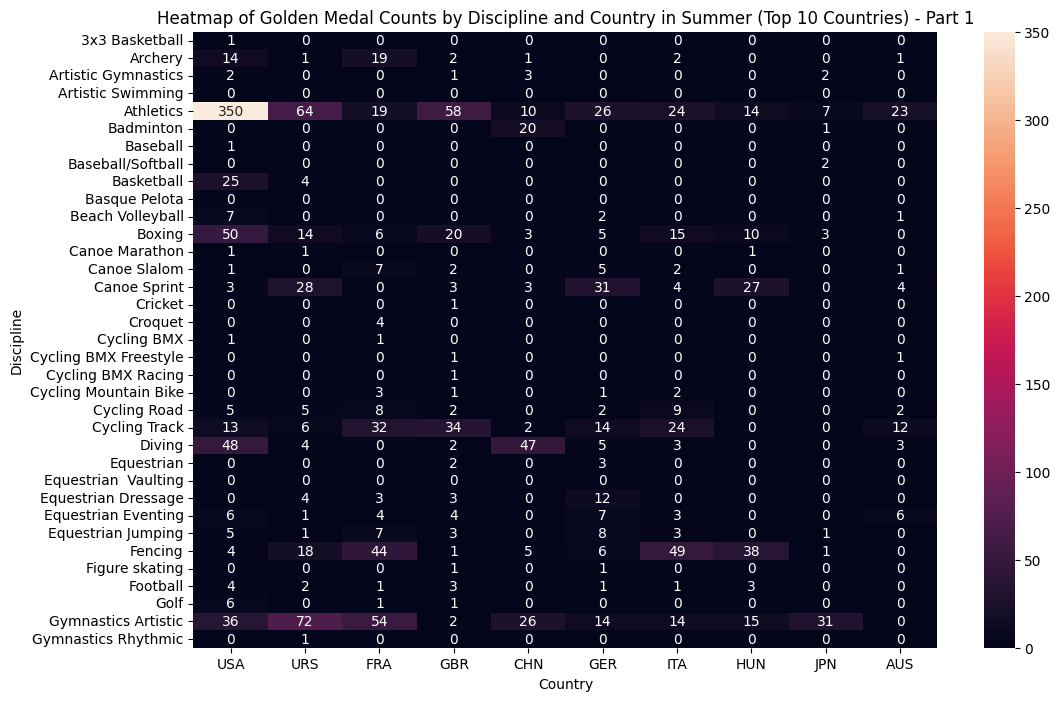

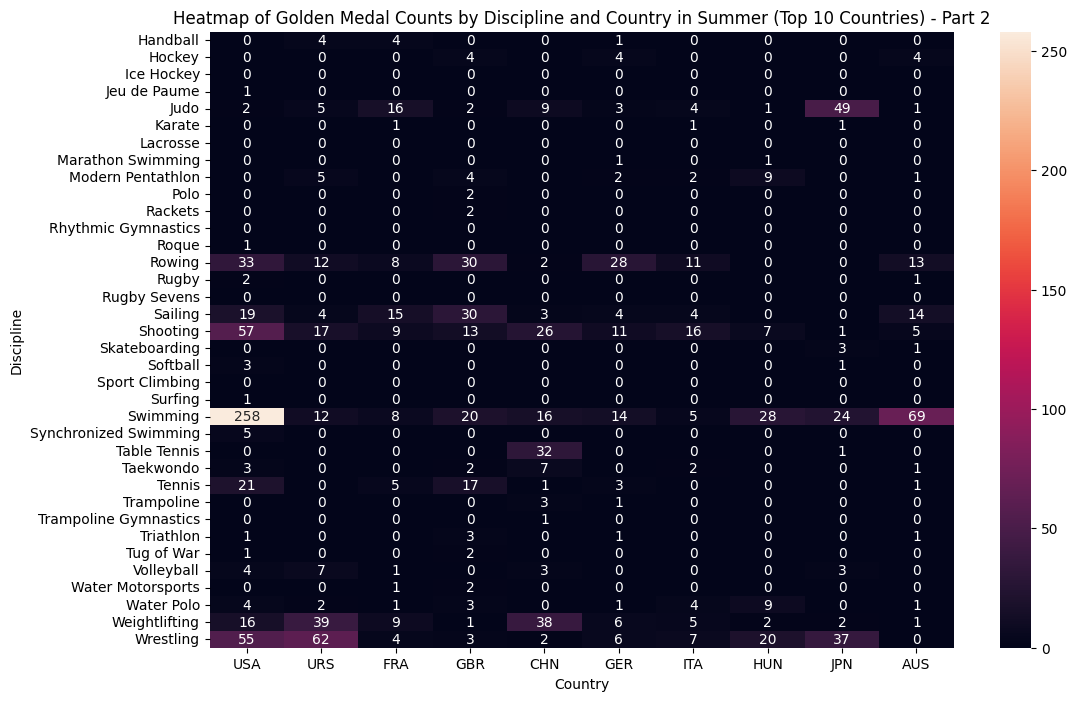

In [26]:
# Split the heatmap_summer DataFrame into two halves
half = len(heatmap_summer) // 2
heatmap_summer_1 = heatmap_summer.iloc[:half]
heatmap_summer_2 = heatmap_summer.iloc[half:]

# Create the first plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_summer_1, annot=True, fmt='.0f')
plt.title('Heatmap of Golden Medal Counts by Discipline and Country in Summer (Top 10 Countries) - Part 1')
plt.xlabel('Country')
plt.ylabel('Discipline')
plt.show()

# Create the second plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_summer_2, annot=True, fmt='.0f')
plt.title('Heatmap of Golden Medal Counts by Discipline and Country in Summer (Top 10 Countries) - Part 2')
plt.xlabel('Country')
plt.ylabel('Discipline')
plt.show()

In [27]:
df_results_merged = df_results.merge(df_hosts, left_on='slug_game', right_on='game_slug')
df_results_summer = df_results_merged.query('game_season == "Summer"')
df_results_winter = df_results_merged.query('game_season == "Winter"')

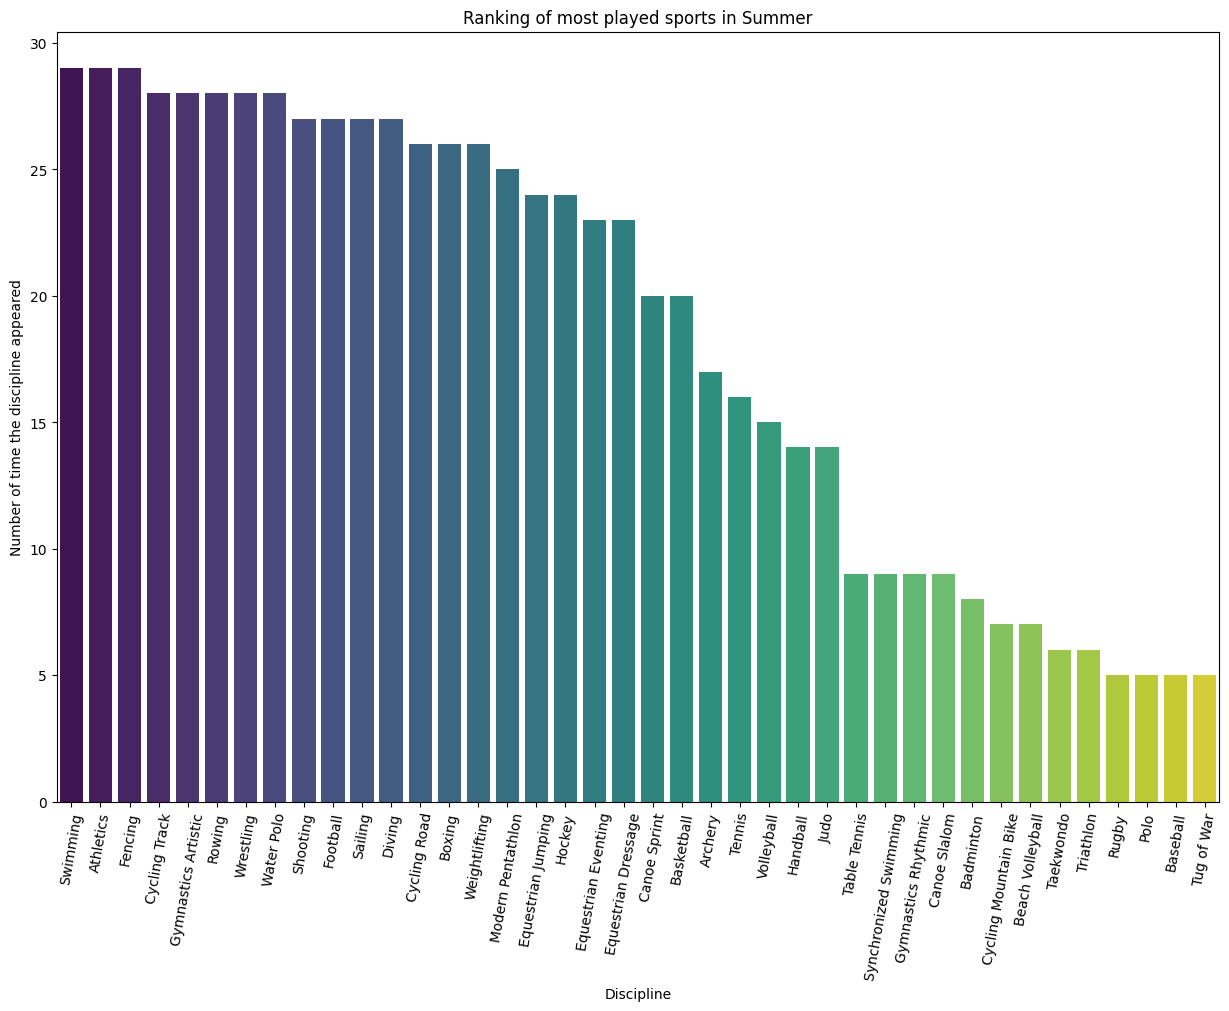

In [28]:
# Get the ranking of most played sports

# drop duplicates [discipline_title, slug_game]
df_results_unique_sport_per_game = df_results_summer.drop_duplicates(subset=['discipline_title', 'slug_game'])

most_played_sports = df_results_unique_sport_per_game['discipline_title'].value_counts().reset_index().sort_values(by='count', ascending=False)

# Plot the ranking of most played sports
plt.figure(figsize=(15, 10))
sns.barplot(data=most_played_sports.head(40), x='discipline_title', y='count', palette='viridis')
plt.title('Ranking of most played sports in Summer')
plt.xlabel('Discipline')
plt.ylabel('Number of time the discipline appeared')
plt.xticks(rotation=80)
plt.show()

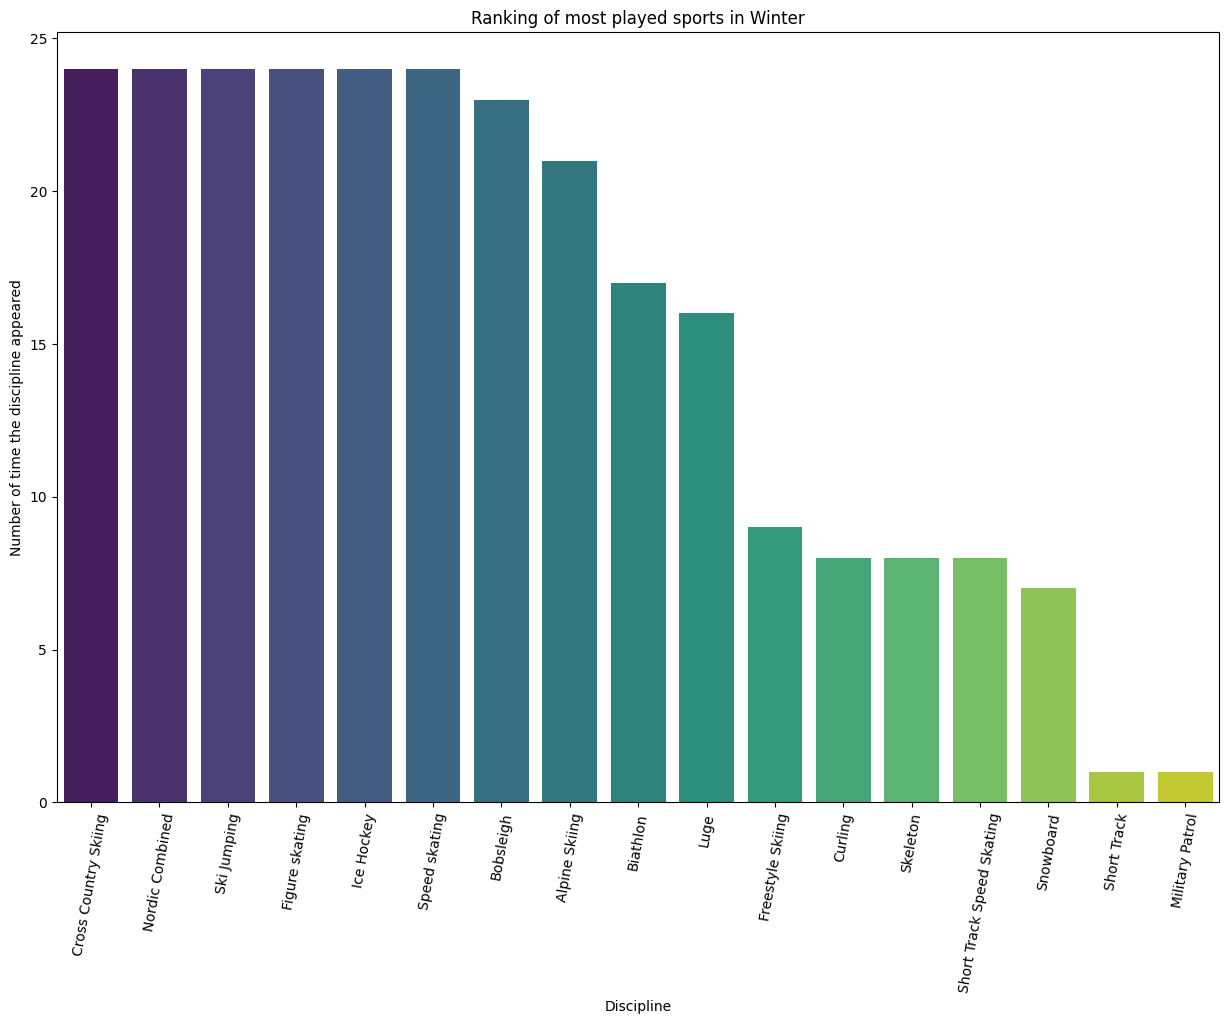

In [29]:
df_results_unique_sport_per_game = df_results_winter.drop_duplicates(subset=['discipline_title', 'slug_game'])

most_played_sports = df_results_unique_sport_per_game['discipline_title'].value_counts().reset_index().sort_values(by='count', ascending=False)

# Plot the ranking of most played sports
plt.figure(figsize=(15, 10))
sns.barplot(data=most_played_sports, x='discipline_title', y='count', palette='viridis')
plt.title('Ranking of most played sports in Winter')
plt.xlabel('Discipline')
plt.ylabel('Number of time the discipline appeared')
plt.xticks(rotation=80)
plt.show()

# Statistics PART (Fabio)

In [80]:
#keep only columns discipline title, slug game and event title
df_results = df_results[['discipline_title', 'slug_game', 'event_title']]
df_results = df_results.drop_duplicates()
df_results

,discipline_title,slug_game,event_title
0,Curling,beijing-2022,Mixed Doubles
1,Curling,beijing-2022,Women
2,Curling,beijing-2022,Men
3,Freestyle Skiing,beijing-2022,Men's Moguls
4,Freestyle Skiing,beijing-2022,Men's Freeski Halfpipe
...,...,...,...
6715,Tennis,athens-1896,Singles men
6716,Tennis,athens-1896,doubles men
6717,Wrestling,athens-1896,"Unlimited Class, Greco-Roman Men"
6718,Weightlifting,athens-1896,heavyweight - one hand lift men


In [81]:
#merge df_results with df_hosts (on slug_game) to obtain df_results + the column game_season added
df_results = df_results.merge(df_hosts[['game_slug', 'game_season','game_name','game_year']], left_on='slug_game', right_on='game_slug')
df_results

,discipline_title,slug_game,event_title,game_slug,game_season,game_name,game_year
0,Curling,beijing-2022,Mixed Doubles,beijing-2022,Winter,Beijing 2022,2022
1,Curling,beijing-2022,Women,beijing-2022,Winter,Beijing 2022,2022
2,Curling,beijing-2022,Men,beijing-2022,Winter,Beijing 2022,2022
3,Freestyle Skiing,beijing-2022,Men's Moguls,beijing-2022,Winter,Beijing 2022,2022
4,Freestyle Skiing,beijing-2022,Men's Freeski Halfpipe,beijing-2022,Winter,Beijing 2022,2022
...,...,...,...,...,...,...,...
6715,Tennis,athens-1896,Singles men,athens-1896,Summer,Athens 1896,1896
6716,Tennis,athens-1896,doubles men,athens-1896,Summer,Athens 1896,1896
6717,Wrestling,athens-1896,"Unlimited Class, Greco-Roman Men",athens-1896,Summer,Athens 1896,1896
6718,Weightlifting,athens-1896,heavyweight - one hand lift men,athens-1896,Summer,Athens 1896,1896


In [82]:
df_results_two = df_results.copy()
df_results_two = df_results_two[['discipline_title', 'game_season', 'event_title', 'game_name','game_year']]

In [83]:
## Add the medals to each edition
df_medals = pd.read_csv(os.path.join(DATA_PATH, 'olympic_medals_join.csv'))


In [84]:
cols_of_interest = ['discipline_title','game_season','event_title','game_name','game_year', 'medal_type', 'athlete_full_name', 'country_3_letter_code', 'participant_type']

#Take from df_medals only the columns of interest 
df_sorted = df_medals[cols_of_interest]


In [85]:
#Replace the NaN values in the athlete_full_name column by the country_3_letter_code
#df_sorted['athlete_full_name'] = df_sorted['athlete_full_name'].fillna(df_sorted['country_3_letter_code'])
df_sorted['Medalist'] = df_sorted['athlete_full_name'] + str(' (') + df_sorted['country_3_letter_code'] + str(')')


In [86]:
#If Medalist is NaN, replace it by the country_3_letter_code
df_sorted['Medalist'] = df_sorted['Medalist'].fillna(df_sorted['country_3_letter_code'])
# And if the participant_type is team, replace the Medalist by the country_3_letter_code
df_sorted['Medalist'] = df_sorted['Medalist'].where(df_sorted['participant_type'] != 'GameTeam', df_sorted['country_3_letter_code'])

In [87]:
#Now that we create the column for the medalist drop 'athlete_full_name','country_3_letter_code' columns
df_sorted = df_sorted.drop(columns=['athlete_full_name','country_3_letter_code'])

In [88]:
#Check if Team Medalist is not NaN
df_sorted.query('discipline_title == "Ice Hockey"')

,discipline_title,game_season,event_title,game_name,game_year,medal_type,participant_type,Medalist
166,Ice Hockey,Winter,Men,Beijing 2022,2022,GOLD,GameTeam,FIN
167,Ice Hockey,Winter,Men,Beijing 2022,2022,SILVER,GameTeam,ROC
168,Ice Hockey,Winter,Men,Beijing 2022,2022,BRONZE,GameTeam,SVK
169,Ice Hockey,Winter,Women,Beijing 2022,2022,GOLD,GameTeam,CAN
170,Ice Hockey,Winter,Women,Beijing 2022,2022,SILVER,GameTeam,USA
...,...,...,...,...,...,...,...,...
19858,Ice Hockey,Winter,ice hockey men,Chamonix 1924,1924,SILVER,GameTeam,USA
19859,Ice Hockey,Winter,ice hockey men,Chamonix 1924,1924,BRONZE,GameTeam,GBR
19955,Ice Hockey,Summer,ice hockey men,Antwerp 1920,1920,GOLD,GameTeam,CAN
19956,Ice Hockey,Summer,ice hockey men,Antwerp 1920,1920,SILVER,GameTeam,USA


In [89]:
# We want now to take for each event_title GOLD, SILVER and BRONZE medalist that are now on 3 lines in One Line, creating 3 columns GOLD, SILVER, BRONZE
df_medalist = df_sorted.pivot_table(index=['discipline_title','game_season','event_title','game_name','game_year'], columns='medal_type', values='Medalist', aggfunc='first').reset_index()

In [90]:
# Sort the dataframe by game_year
df_medalist = df_medalist.sort_values(by='game_year', ascending=False)

In [91]:
df_medalist

medal_type,discipline_title,game_season,event_title,game_name,game_year,BRONZE,GOLD,SILVER
5030,Speed skating,Winter,Men's 10000m,Beijing 2022,2022,Davide GHIOTTO (ITA),Nils VAN DER POEL (SWE),Patrick ROEST (NED)
4829,Snowboard,Winter,Men's Snowboard Slopestyle,Beijing 2022,2022,Mark MCMORRIS (CAN),Max PARROT (CAN),Yiming SU (CHN)
4827,Snowboard,Winter,Men's Snowboard Cross,Beijing 2022,2022,Omar VISINTIN (ITA),Alessandro HAEMMERLE (AUT),Eliot GRONDIN (CAN)
4826,Snowboard,Winter,Men's Snowboard Big Air,Beijing 2022,2022,Max PARROT (CAN),Yiming SU (CHN),Mons ROISLAND (NOR)
4825,Snowboard,Winter,Men's Parallel Giant Slalom,Beijing 2022,2022,Vic WILD (ROC),Benjamin KARL (AUT),Tim MASTNAK (SLO)
...,...,...,...,...,...,...,...,...
2317,Cycling Track,Summer,12-hour race men,Athens 1896,1896,NaN,Adolf SCHMAL (AUT),Frederick Keeping (GBR)
3378,Gymnastics Artistic,Summer,rope climbing men,Athens 1896,1896,Fritz HOFMANN (GER),Nikolaos ANDRIAKOPOULOS (GRE),Thomas Xenakis (GRE)
879,Athletics,Summer,discus throw men,Athens 1896,1896,Sotirios VERSIS (GRE),Bob Garrett (USA),Panagiotis PARASKEVOPOULOS (GRE)
2316,Cycling Track,Summer,10km men,Athens 1896,1896,Adolf SCHMAL (AUT),Paul MASSON (FRA),Léon FLAMENG (FRA)


In [92]:
# Save the results in a csv file (used for the Wheelchart)
df_medalist.to_csv(os.path.join(DATA_PATH, 'olympic_results_join.csv'), index=False)